## Load data and import python packages

Link to data definition: https://www.bls.gov/help/hlpforma.htm#AP

In [ ]:
#clone GitHuB repository so all team members can work off the same data
!git clone https://github.com/severelylefty/MSDS432.git

Cloning into 'MSDS432'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
!ls

MSDS432  sample_data


In [ ]:
import numpy as np
import pandas as pd
#for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
inflation = pd.read_csv('/content/MSDS432/inf_data_upload.csv')
inflation2 = pd.read_csv('/content/MSDS432/inf_data_upload_2.csv')

frames = [inflation,inflation2]

#Union dataset to create one dataframe
#Originating datasets were split into 2 due to size contraints with GitHub
union_df = pd.concat(frames)


## Basic exploration of the dataset

In [ ]:
union_df.head(10)

,series_id,prefix,sa_code,period,area_code,base_code,item_code,item_description,area_description,Evaluation_Date,inf_value
0,CUURS35ASA0,CU,U,R,S35A,S,A0,All items,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,113.7
1,CUUSS35ASA0,CU,U,S,S35A,S,A0,All items,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,113.7
2,CUURS35ASAA,CU,U,R,S35A,S,AA,Apparel,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
3,CUUSS35ASAA,CU,U,S,S35A,S,AA,Apparel,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
4,CUURS35ASAE,CU,U,R,S35A,S,AE,Education and communication,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
5,CUUSS35ASAE,CU,U,S,S35A,S,AE,Education and communication,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
6,CUURS35ASAF,CU,U,R,S35A,S,AF,Food and beverages,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
7,CUUSS35ASAF,CU,U,S,S35A,S,AF,Food and beverages,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
8,CUURS35ASAF1,CU,U,R,S35A,S,AF1,Food,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0
9,CUUSS35ASAF1,CU,U,S,S35A,S,AF1,Food,"Washington-Arlington-Alexandria, DC-VA-MD-WV...",1/31/87,0.0


In [ ]:
union_df.tail()

,series_id,prefix,sa_code,period,area_code,base_code,item_code,item_description,area_description,Evaluation_Date,inf_value
222798,CUUS0120SAT,CU,U,S,120,S,AT,Transportation,Middle Atlantic,12/31/22,0.0
222799,CUUR0120SAT1,CU,U,R,120,S,AT1,Private transportation,Middle Atlantic,12/31/22,0.0
222800,CUUS0120SAT1,CU,U,S,120,S,AT1,Private transportation,Middle Atlantic,12/31/22,0.0
222801,CUUR0120SETB,CU,U,R,120,S,ETB,Motor fuel,Middle Atlantic,12/31/22,0.0
222802,CUUS0120SETB,CU,U,S,120,S,ETB,Motor fuel,Middle Atlantic,12/31/22,0.0


In [ ]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445504 entries, 0 to 222802
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   series_id         445504 non-null  object 
 1   prefix            445504 non-null  object 
 2   sa_code           445504 non-null  object 
 3   period            445504 non-null  object 
 4   area_code         445504 non-null  object 
 5   base_code         445504 non-null  object 
 6   item_code         445504 non-null  object 
 7   item_description  445504 non-null  object 
 8   area_description  445504 non-null  object 
 9   Evaluation_Date   445504 non-null  object 
 10  inf_value         445504 non-null  float64
dtypes: float64(1), object(10)
memory usage: 40.8+ MB


In [ ]:
union_df.columns, len(union_df)

(Index(['series_id', 'prefix', 'sa_code', 'period', 'area_code', 'base_code',
        'item_code', 'item_description', 'area_description', 'Evaluation_Date',
        'inf_value'],
       dtype='object'), 445504)

In [ ]:
len(union_df.series_id.unique())

1038

## Clean data

In [ ]:
# remove white spaces from the data entries

union_df['prefix'] = union_df['prefix'].str.strip()
union_df['sa_code'] = union_df['sa_code'].str.strip()
union_df['period'] = union_df['period'].str.strip()
union_df['area_code'] = union_df['area_code'].str.strip()
union_df['base_code'] = union_df['base_code'].str.strip()
union_df['item_code'] = union_df['item_code'].str.strip()
union_df['item_description'] = union_df['item_description'].str.strip()
union_df['area_description'] = union_df['area_description'].str.strip()
union_df['Evaluation_Date'] = union_df['Evaluation_Date'].str.strip()

In [ ]:
# count unique values in each column 
print(union_df.nunique())

series_id            1038
prefix                  1
sa_code                 1
period                  2
area_code              36
base_code               1
item_code              17
item_description       17
area_description       36
Evaluation_Date       432
inf_value           42537
dtype: int64


In [ ]:
# count each distinct values inf_value
print(union_df['inf_value'].value_counts())

#over half of the records are inf_value=0, 0 value being treated as null

0.000      258522
100.000       306
112.800       162
130.000       148
122.800       148
            ...  
244.054         2
238.894         2
119.726         2
129.140         2
158.247         2
Name: inf_value, Length: 42537, dtype: int64


In [ ]:
#removing null values, in this data set 0 is a null value
union_df = union_df[union_df.inf_value != 0]

In [ ]:
# check after removing nulls
print(union_df['inf_value'].describe())
print(union_df.describe())

count    186982.000000
mean        201.179038
std         110.180272
min          68.500000
25%         129.400000
50%         176.600000
75%         240.434750
max        1565.734000
Name: inf_value, dtype: float64
           inf_value
count  186982.000000
mean      201.179038
std       110.180272
min        68.500000
25%       129.400000
50%       176.600000
75%       240.434750
max      1565.734000


## Outlier Exploration

There seems to be a lot of possible outliers. Keeping them because, this could be valid data as it may reflect unpresedented decline of economy


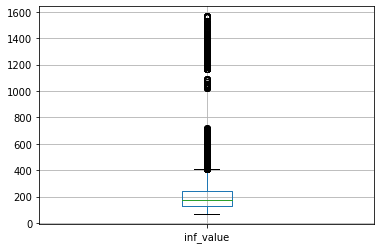

In [ ]:
#Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?
union_df['inf_value'].describe(percentiles = [.25, .5, .75, .95])
union_df.boxplot(column = 'inf_value')

print('There seems to be a lot of possible outliers. Keeping them because, this could be valid data as it may reflect unpresedented decline of economy')

In [ ]:
#separating data based on sa_code
#S represents semi-annual inflation values whereas R represents monthly
#Splitting the dataset by period was deemed necessary for EDA

union_df_period_s = union_df[union_df.period == 'S']
union_df_period_r = union_df[union_df.period == 'R']

union_df.count()
union_df[union_df.period == 'S'].count()
union_df[union_df.period == 'R'].count()


series_id           93491
prefix              93491
sa_code             93491
period              93491
area_code           93491
base_code           93491
item_code           93491
item_description    93491
area_description    93491
Evaluation_Date     93491
inf_value           93491
dtype: int64

In [ ]:
union_df_period_s.period.unique()
union_df_period_s.period.unique()

array(['S'], dtype=object)

## Look more closely at the data from the last 4 years

In [ ]:
from datetime import datetime

#pick data from the last 4 years

union_df['Evaluation_Date'] = pd.to_datetime(union_df['Evaluation_Date']).dt.date

mask = (union_df['Evaluation_Date'] >= pd.to_datetime('1/31/18')) & (union_df['Evaluation_Date'] <= pd.to_datetime('6/2/22'))
last_4_years = union_df.loc[mask]
min(union_df['Evaluation_Date']), max(union_df['Evaluation_Date'])

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(datetime.date(1987, 1, 31), datetime.date(2022, 4, 30))

In [ ]:
last_4_years['area_description'] = last_4_years['area_description'].apply(lambda x: x.strip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Inflation Value')

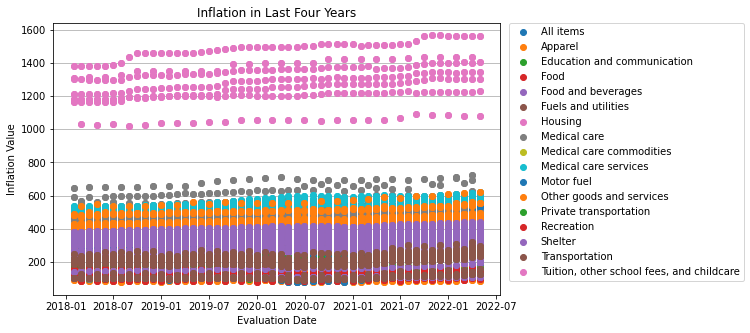

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

fig = plt.figure(figsize=(8, 5))
groups = last_4_years.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("Inflation in Last Four Years")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

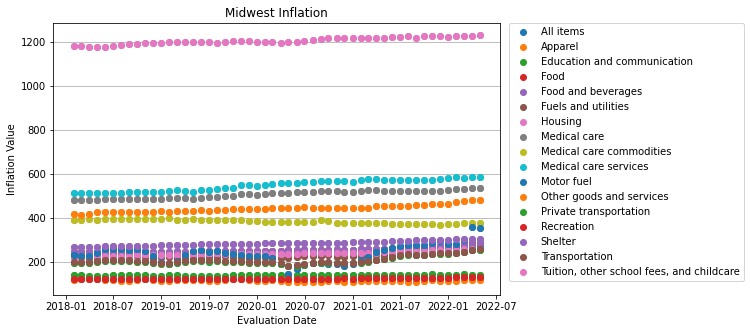

In [ ]:
midwest = last_4_years[last_4_years['area_description']=='Midwest']


fig = plt.figure(figsize=(8, 5))
groups = midwest.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("Midwest Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

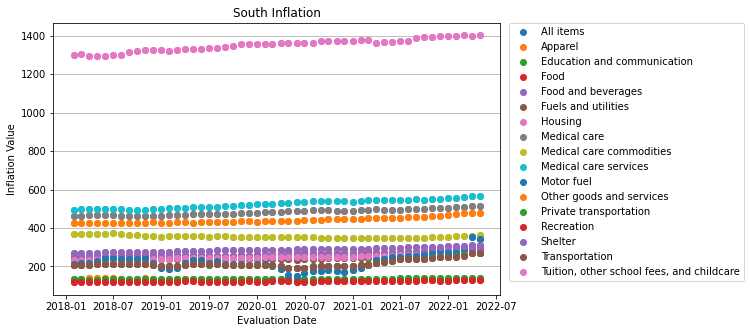

In [ ]:
south = last_4_years[last_4_years['area_description']=='South']


fig = plt.figure(figsize=(8, 5))
groups = south.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("South Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

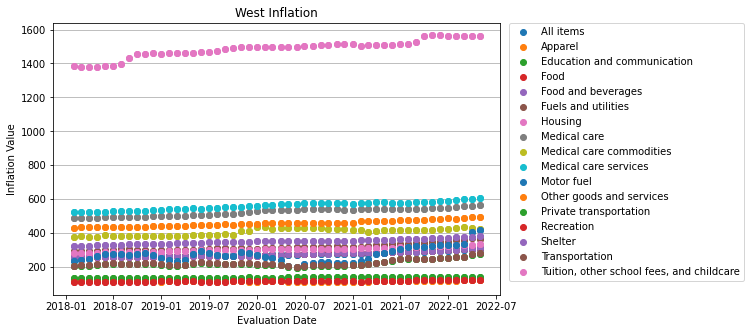

In [ ]:
west = last_4_years[last_4_years['area_description']=='West']

fig = plt.figure(figsize=(8, 5))
groups = west.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("West Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

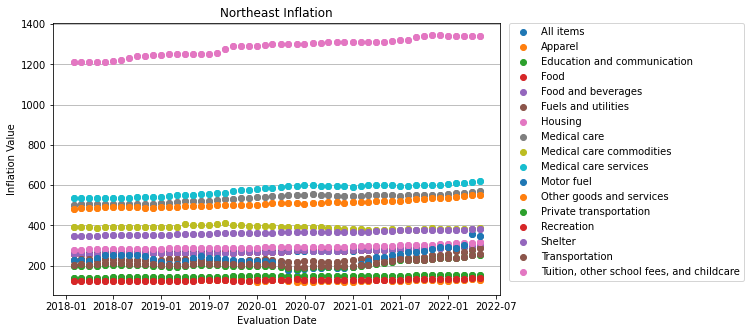

In [ ]:
Northeast = last_4_years[last_4_years['area_description']=='Northeast']

fig = plt.figure(figsize=(8, 5))
groups = Northeast.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("Northeast Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

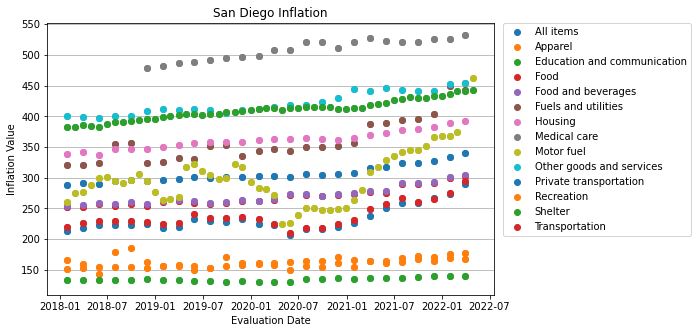

In [ ]:
# I actually live here
sandiego = last_4_years[last_4_years['area_description']=='San Diego-Carlsbad, CA']


fig = plt.figure(figsize=(8, 5))
groups = sandiego.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("San Diego Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

Text(0, 0.5, 'Inflation Value')

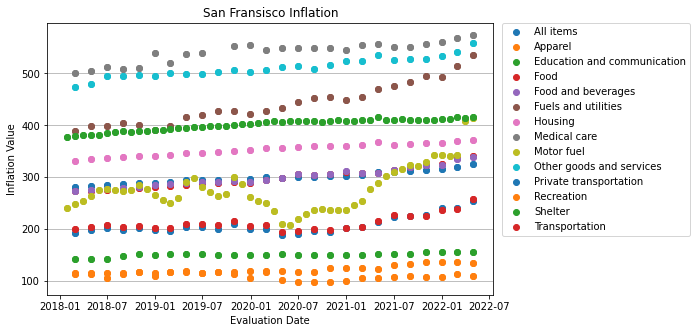

In [ ]:
sanfransisco = last_4_years[last_4_years['area_description']=='San Francisco-Oakland-Hayward, CA']


fig = plt.figure(figsize=(8, 5))
groups = sanfransisco.groupby("item_description")
for name, group in groups:
    plt.plot(group["Evaluation_Date"], group["inf_value"], marker="o", linestyle="", label=name)
plt.title("San Fransisco Inflation")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Evaluation Date")
plt.ylabel("Inflation Value")

## Additional EDA

[Text(0.5, 1.0, 'Inflation value by Item description')]

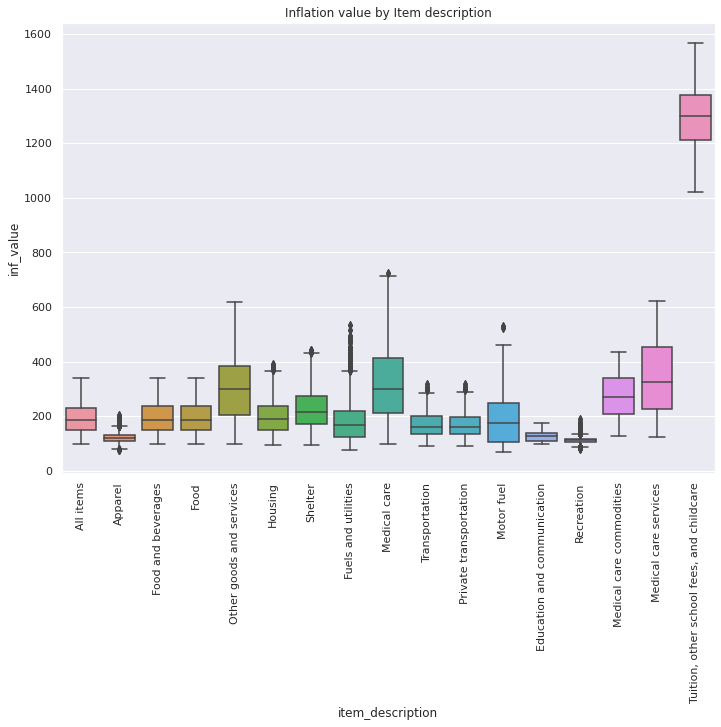

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(x='item_description', y='inf_value', data=union_df )
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(title="Inflation value by Item description")